In [1]:
PATH="/kaggle/input/twitter-and-reddit-sentimental-analysis-dataset"
CSV_TWITTER="Twitter_Data.csv"
CSV_REDDIT="Reddit_Data.csv"

In [2]:
import pandas as pd

try:
    DATA_TWITTER=pd.read_csv(f'{PATH}/{CSV_TWITTER}')
    print(DATA_TWITTER)
except FileNotFoundError:
    print(f'file not found at {PATH}/{CSV_TWITTER}. Check PATH again')
except Exception as e:
    print('Exception occurs while loading csv file:',e)

                                               clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]


In [3]:
DATA_TWITTER=DATA_TWITTER.rename(columns={'clean_comment':'clean_text'})

In [4]:
from sklearn.preprocessing import LabelEncoder # encode label
import re

# remove/clean text
def clean_media_text(text):
    text=str(text)
    text=text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text) # rm mention @abcd
    text = re.sub(r'\bRT\b|\bFAV\b', '', text) # rm RT, FAV
    text=re.sub(r'\d+','',text) # rm number d
    text = re.sub(r'[^\w\s]', '', text) # rm not word, not space
    text = re.sub(r'\s+', ' ', text).strip() # rm extraneous space '  '
    return text

DATA_TWITTER_V1=DATA_TWITTER.dropna(subset=['category','clean_text'])
DATA_TWITTER_V1['encoded_category']= DATA_TWITTER['category'].apply(lambda c: 0 if c==-1.0 else 1 if c==0 else 2) # LabelEncoder().fit_transform(DATA_TWITTER_V1['category'])
DATA_TWITTER_V1['clean_text.v1']=DATA_TWITTER['clean_text'].apply(clean_media_text)

print(DATA_TWITTER_V1)

/tmp/ipykernel_24/3846715975.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_TWITTER_V1['encoded_category']= DATA_TWITTER['category'].apply(lambda c: 0 if c==-1.0 else 1 if c==0 else 2) # LabelEncoder().fit_transform(DATA_TWITTER_V1['category'])


                                               clean_text  category  \
0       when modi promised “minimum government maximum...      -1.0   
1       talk all the nonsense and continue all the dra...       0.0   
2       what did just say vote for modi  welcome bjp t...       1.0   
3       asking his supporters prefix chowkidar their n...       1.0   
4       answer who among these the most powerful world...       1.0   
...                                                   ...       ...   
162975  why these 456 crores paid neerav modi not reco...      -1.0   
162976  dear rss terrorist payal gawar what about modi...      -1.0   
162977  did you cover her interaction forum where she ...       0.0   
162978  there big project came into india modi dream p...       0.0   
162979  have you ever listen about like gurukul where ...       1.0   

        encoded_category                                      clean_text.v1  
0                      0  when modi promised minimum government maxim

/tmp/ipykernel_24/3846715975.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_TWITTER_V1['clean_text.v1']=DATA_TWITTER['clean_text'].apply(clean_media_text)


In [5]:
DATA_TWITTER_VF=DATA_TWITTER_V1
X=DATA_TWITTER_VF.drop(['category','encoded_category','clean_text'],axis=1) # only clean_text.v1
Y=DATA_TWITTER_VF['encoded_category']
NUM_FEATURES=X.shape[1]
NUM_CLASSES=max(Y)+1 # Y starts from 0
print(X)
print(Y)
print('number of features and classes:',NUM_FEATURES,NUM_CLASSES)

                                            clean_text.v1
0       when modi promised minimum government maximum ...
1       talk all the nonsense and continue all the dra...
2       what did just say vote for modi welcome bjp to...
3       asking his supporters prefix chowkidar their n...
4       answer who among these the most powerful world...
...                                                   ...
162975  why these crores paid neerav modi not recovere...
162976  dear rss terrorist payal gawar what about modi...
162977  did you cover her interaction forum where she ...
162978  there big project came into india modi dream p...
162979  have you ever listen about like gurukul where ...

[162969 rows x 1 columns]
0         0
1         1
2         2
3         2
4         2
         ..
162975    0
162976    0
162977    1
162978    1
162979    2
Name: encoded_category, Length: 162969, dtype: int64
number of features and classes: 1 3


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer # create features for text

tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',  # Automatically removes common English stopwords
    max_features=10000,     # Keep the 10000 most frequent words/ngrams
    ngram_range=(1, 3)     # Consider individual words, two-word phrases, 3-word phrases
)
X_text_features = tfidf_vectorizer.fit_transform(X['clean_text.v1']) # fit: learn vocabulary score, transform: apply score for text
print(X_text_features[:2])
print(tfidf_vectorizer.get_feature_names_out()[:10])

  (0, 5870)	0.2142451502452711
  (0, 8985)	0.27281671668713314
  (0, 7310)	0.3049171303208342
  (0, 2862)	0.2902975543369383
  (0, 1155)	0.20867526397397115
  (0, 4528)	0.23414460951176863
  (0, 9933)	0.13790599948461477
  (0, 2418)	0.16746782337042812
  (0, 8596)	0.3579252521979858
  (0, 4441)	0.17867034316065344
  (0, 2326)	0.23499006484402601
  (0, 772)	0.26322185222394284
  (0, 2867)	0.2328712629766354
  (0, 3463)	0.22158360953390005
  (0, 5224)	0.25006067092314105
  (0, 3466)	0.14477267548027659
  (0, 5323)	0.21782238528110728
  (0, 7237)	0.19159043182830224
  (0, 5413)	0.038463009098715834
  (1, 9590)	0.3348313629433156
  (1, 9579)	0.2751308610696456
  (1, 2535)	0.46134836232077175
  (1, 1761)	0.4533260711828748
  (1, 6508)	0.4829123837452092
  (1, 8897)	0.39274505931528253
  (1, 5413)	0.07994421464617223
['aadhaar' 'aadhar' 'aadmi' 'aage' 'aaj' 'aaj tak' 'aalo' 'aam' 'aane'
 'aap']


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_text_features, Y, test_size=0.2, random_state=42, stratify=Y
)

print(f"Initial class distribution: {Y.value_counts()}")
print(f"Class distribution in y_train before resampling:{y_train.value_counts()}")

Initial class distribution: encoded_category
2    72249
1    55211
0    35509
Name: count, dtype: int64
Class distribution in y_train before resampling:encoded_category
2    57799
1    44169
0    28407
Name: count, dtype: int64


In [8]:
X_train_resampled, y_train_resampled = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)
print(f"Resampled training class distribution: {y_train_resampled.value_counts()}")

Resampled training class distribution: encoded_category
0    28407
1    28407
2    28407
Name: count, dtype: int64


In [9]:
from sklearn.linear_model import LogisticRegression # linear model
model = LogisticRegression(
    multi_class='multinomial', # specify softmax regression for multi-class problems
    solver='lbfgs', # good default solver for multinomial logistic regression
    max_iter=10000, # increase max_iter if doesn't converge
    random_state=42,
    C=2.5, # Regularization strength
    verbose=True
)

In [10]:
model.fit(X_train_resampled, y_train_resampled)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30003     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.36248D+04    |proj g|=  4.37538D+02


 This problem is unconstrained.



At iterate   50    f=  3.96131D+04    |proj g|=  1.06161D+02

At iterate  100    f=  3.88259D+04    |proj g|=  1.62138D+02

At iterate  150    f=  3.87011D+04    |proj g|=  4.03471D+01

At iterate  200    f=  3.86895D+04    |proj g|=  5.64432D+00

At iterate  250    f=  3.86881D+04    |proj g|=  4.68503D-01

At iterate  300    f=  3.86880D+04    |proj g|=  1.77424D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30003    314    358      1     0     0   3.691D-01   3.869D+04
  F =   38687.980439160594     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


LogisticRegression(C=2.5, max_iter=10000, multi_class='multinomial',
                   random_state=42, verbose=True)

In [11]:
# Evaluate the Model
y_pred=model.predict(X_test)

print("\n--- Softmax Regression Model Evaluation on Test Set ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.4f}")


--- Softmax Regression Model Evaluation on Test Set ---

Confusion Matrix:
[[ 5779   739   584]
 [  337 10405   300]
 [ 1301  1751 11398]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      7102
           1       0.81      0.94      0.87     11042
           2       0.93      0.79      0.85     14450

    accuracy                           0.85     32594
   macro avg       0.84      0.85      0.84     32594
weighted avg       0.85      0.85      0.85     32594


Accuracy Score: 0.8462


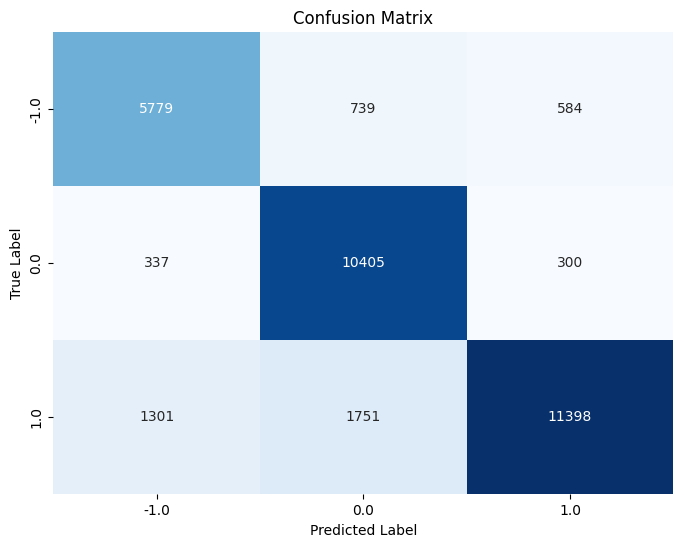

Confusion Matrix:
 [[ 5779   739   584]
 [  337 10405   300]
 [ 1301  1751 11398]]


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=DATA_TWITTER_V1['category'].unique(), yticklabels=DATA_TWITTER_V1['category'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

In [13]:
import pickle # save trained model to file using pickle

model_filename_pkl = '/kaggle/working/logistic_regression.pkl'
with open(model_filename_pkl, 'wb') as file: # wb: write binary
    pickle.dump(model, file)

print(f"\nModel successfully saved as '{model_filename_pkl}' using pickle.")


Model successfully saved as '/kaggle/working/logistic_regression.pkl' using pickle.
